# Задача кредитного скоринга

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imblearn openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn import over_sampling
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data1_df = pd.read_excel("credit_risk_file_1.xlsx")
data1_df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [ ]:
data2_df = pd.read_excel("credit_risk_file_2.xlsx")
data2_df

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


In [ ]:
combined_df = pd.merge(data1_df, data2_df, on='PROSPECTID', how="inner")
combined_df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


## Анализ общего датасета:

Закодируем целевую переменную

In [ ]:
le = LabelEncoder()
combined_df['Approved_Flag'] = le.fit_transform(combined_df['Approved_Flag'])

<h3>Выделим целевую переменную и проверим на дисбаланс</h3>

<Axes: >

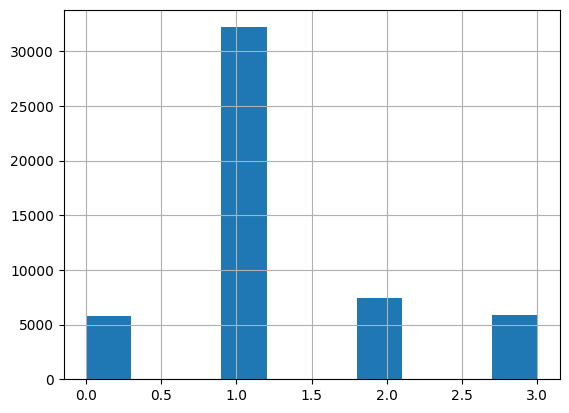

In [ ]:
combined_df['Approved_Flag'].hist()

<h2>Данные не сбалансированны</h2>
<br>
Поэтому нельзя использовать метрику *Accuracy*, для оценки будут взяты метрики f1 и roc_auc

In [ ]:
combined_df.duplicated().sum()

0

In [ ]:
combined_df = combined_df.drop_duplicates()
combined_df.duplicated().sum()

0

In [ ]:
target_col = combined_df['Approved_Flag'].copy()

In [ ]:
combined_df = combined_df.drop(columns=['Approved_Flag', 'PROSPECTID', 'Credit_Score'])

In [ ]:
combined_df.shape

(51336, 84)

Числовые признаки

In [ ]:
numeric_df = combined_df.select_dtypes(include=np.number)
numeric_df

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag
0,5,4,1,0,0,0.000,0.00,0.200,0.800,0,...,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0
1,1,0,1,0,0,0.000,0.00,1.000,0.000,1,...,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0
2,8,0,8,1,0,0.125,0.00,1.000,0.000,2,...,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0
3,1,0,1,1,0,1.000,0.00,1.000,0.000,1,...,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0
4,3,2,1,0,0,0.000,0.00,0.333,0.667,0,...,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,3,0,3,1,0,0.333,0.00,1.000,0.000,1,...,0,-99999.000,0,0.0,0.0,0.0,0.0,1.661,0,0
51332,4,2,2,0,1,0.000,0.25,0.500,0.500,2,...,0,-99999.000,0,0.0,0.0,0.0,0.0,0.520,0,0
51333,2,1,1,1,1,0.500,0.50,0.500,0.500,2,...,0,-99999.000,0,1.0,0.0,1.0,0.0,0.567,0,0
51334,2,1,1,0,0,0.000,0.00,0.500,0.500,1,...,0,-99999.000,0,0.0,0.0,0.0,0.0,1.202,0,0


Категориальные признаки

In [ ]:
cat_df = combined_df.drop(columns=numeric_df.columns)
cat_df

,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2
0,Married,12TH,M,PL,PL
1,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan
2,Married,SSC,M,ConsumerLoan,others
3,Married,SSC,M,others,others
4,Married,POST-GRADUATE,M,AL,AL
...,...,...,...,...,...
51331,Married,12TH,M,ConsumerLoan,ConsumerLoan
51332,Married,SSC,M,others,others
51333,Married,SSC,M,ConsumerLoan,others
51334,Single,UNDER GRADUATE,F,ConsumerLoan,others


## Анализ категориальных признаков:

In [ ]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MARITALSTATUS    51336 non-null  object
 1   EDUCATION        51336 non-null  object
 2   GENDER           51336 non-null  object
 3   last_prod_enq2   51336 non-null  object
 4   first_prod_enq2  51336 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


Построим круговые диаграммы для всех категориальных признаков

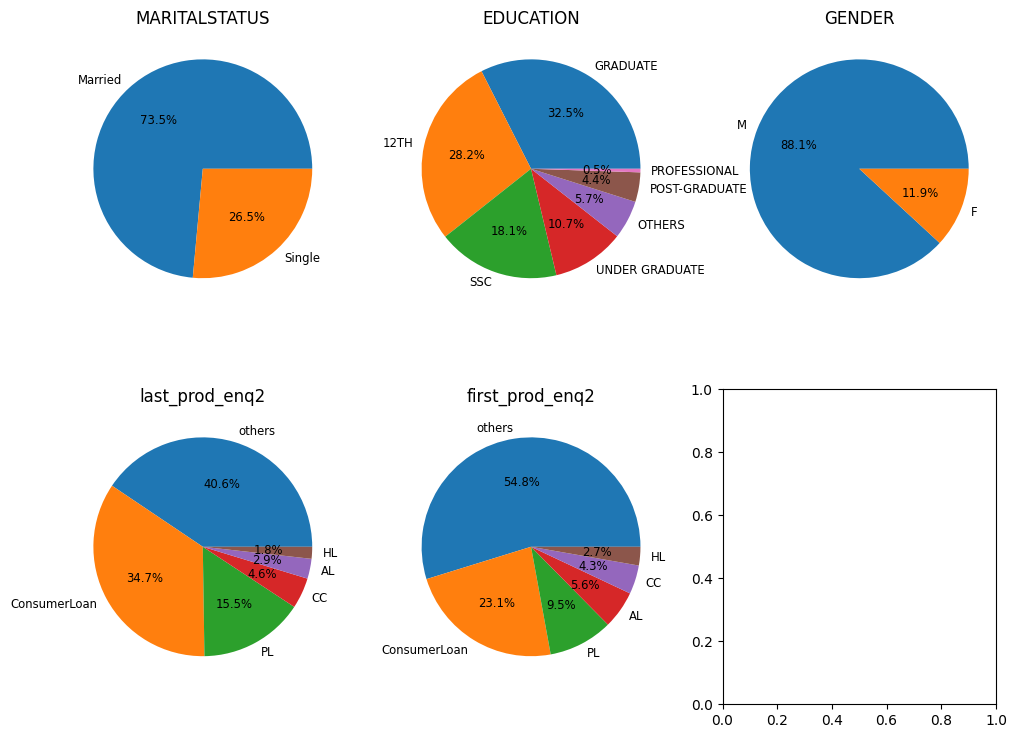

In [ ]:
columns = cat_df.columns

fig, axes = plt.subplots(2, 3, figsize=(12, 9))
axes = axes.flatten()


for ax, column in zip(axes, columns):
  counts = cat_df[column].value_counts()
  ax.set_title(column)

  ax.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=1)

## Анализ числовых признаков

In [ ]:
numeric_df

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag
0,5,4,1,0,0,0.000,0.00,0.200,0.800,0,...,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0
1,1,0,1,0,0,0.000,0.00,1.000,0.000,1,...,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0
2,8,0,8,1,0,0.125,0.00,1.000,0.000,2,...,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0
3,1,0,1,1,0,1.000,0.00,1.000,0.000,1,...,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0
4,3,2,1,0,0,0.000,0.00,0.333,0.667,0,...,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,3,0,3,1,0,0.333,0.00,1.000,0.000,1,...,0,-99999.000,0,0.0,0.0,0.0,0.0,1.661,0,0
51332,4,2,2,0,1,0.000,0.25,0.500,0.500,2,...,0,-99999.000,0,0.0,0.0,0.0,0.0,0.520,0,0
51333,2,1,1,1,1,0.500,0.50,0.500,0.500,2,...,0,-99999.000,0,1.0,0.0,1.0,0.0,0.567,0,0
51334,2,1,1,0,0,0.000,0.00,0.500,0.500,1,...,0,-99999.000,0,0.0,0.0,0.0,0.0,1.202,0,0


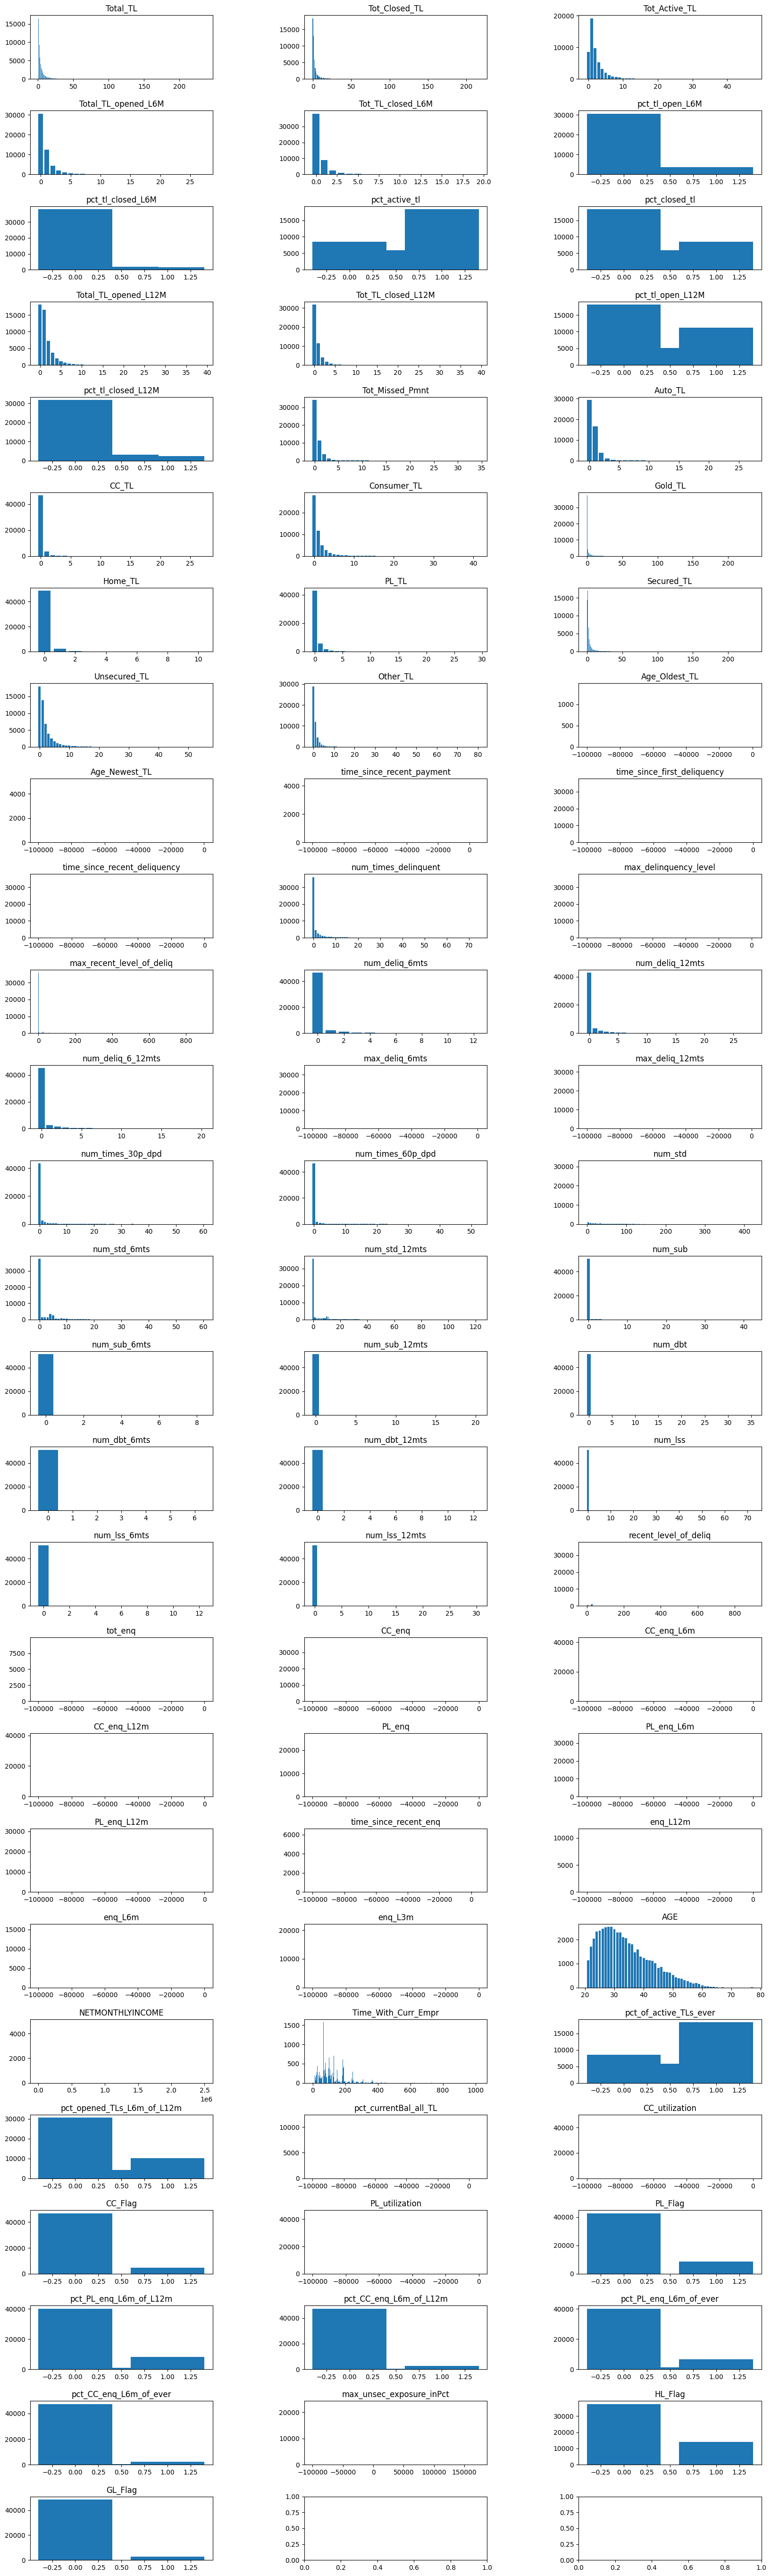

In [ ]:
columns = numeric_df.columns

fig, axes = plt.subplots(27, 3, figsize=(20, 70))
axes = axes.flatten()

for column, ax in zip(columns, axes):
  v_c =  numeric_df[column].value_counts()

  ax.bar(v_c.index, v_c.values)
  ax.set_title(column)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [ ]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Total_TL                      51336 non-null  int64  
 1   Tot_Closed_TL                 51336 non-null  int64  
 2   Tot_Active_TL                 51336 non-null  int64  
 3   Total_TL_opened_L6M           51336 non-null  int64  
 4   Tot_TL_closed_L6M             51336 non-null  int64  
 5   pct_tl_open_L6M               51336 non-null  float64
 6   pct_tl_closed_L6M             51336 non-null  float64
 7   pct_active_tl                 51336 non-null  float64
 8   pct_closed_tl                 51336 non-null  float64
 9   Total_TL_opened_L12M          51336 non-null  int64  
 10  Tot_TL_closed_L12M            51336 non-null  int64  
 11  pct_tl_open_L12M              51336 non-null  float64
 12  pct_tl_closed_L12M            51336 non-null  float64
 13  T

Построим матрицу корелляции

In [ ]:
corr = numeric_df.corr()
corr

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag
Total_TL,1.000000,0.956367,0.652481,0.408441,0.453666,-0.074973,-0.002687,-0.263300,0.263300,0.532552,...,0.164249,0.201447,0.225026,0.071978,0.099260,0.031548,0.073229,0.176329,0.409390,0.098204
Tot_Closed_TL,0.956367,1.000000,0.402606,0.236070,0.388155,-0.140151,0.020013,-0.383012,0.383012,0.336614,...,0.093069,0.117904,0.153221,0.020372,0.049458,-0.012132,0.029816,0.047898,0.417535,0.068004
Tot_Active_TL,0.652481,0.402606,1.000000,0.667361,0.414587,0.128623,-0.060328,0.168503,-0.168503,0.795422,...,0.273202,0.325333,0.307603,0.172670,0.182706,0.130309,0.152096,0.428211,0.199662,0.131294
Total_TL_opened_L6M,0.408441,0.236070,0.667361,1.000000,0.505473,0.529940,0.087148,0.096540,-0.096540,0.836280,...,0.142796,0.224894,0.244400,0.276576,0.223809,0.256616,0.213443,0.312958,0.120232,0.009713
Tot_TL_closed_L6M,0.453666,0.388155,0.414587,0.505473,1.000000,0.032977,0.523685,-0.239570,0.239570,0.609674,...,0.110992,0.182748,0.221463,0.122203,0.124311,0.088363,0.109512,0.130866,0.140065,0.014198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pct_PL_enq_L6m_of_ever,0.031548,-0.012132,0.130309,0.256616,0.088363,0.267800,0.059981,0.090756,-0.090756,0.201662,...,0.037004,0.144373,0.153112,0.965067,0.184264,1.000000,0.184605,0.205231,-0.040392,-0.030617
pct_CC_enq_L6m_of_ever,0.073229,0.029816,0.152096,0.213443,0.109512,0.146982,0.028052,0.044863,-0.044863,0.190506,...,0.265241,0.113207,0.126378,0.196869,0.962371,0.184605,1.000000,0.152432,-0.007460,0.004384
max_unsec_exposure_inPct,0.176329,0.047898,0.428211,0.312958,0.130866,0.253858,-0.090238,0.330022,-0.330022,0.349850,...,0.258400,0.357372,0.317171,0.227780,0.165445,0.205231,0.152432,1.000000,-0.097631,-0.010389
HL_Flag,0.409390,0.417535,0.199662,0.120232,0.140065,-0.099421,-0.038575,-0.343173,0.343173,0.161571,...,0.001039,0.006941,0.006393,-0.030335,-0.002646,-0.040392,-0.007460,-0.097631,1.000000,0.015256


<Axes: >

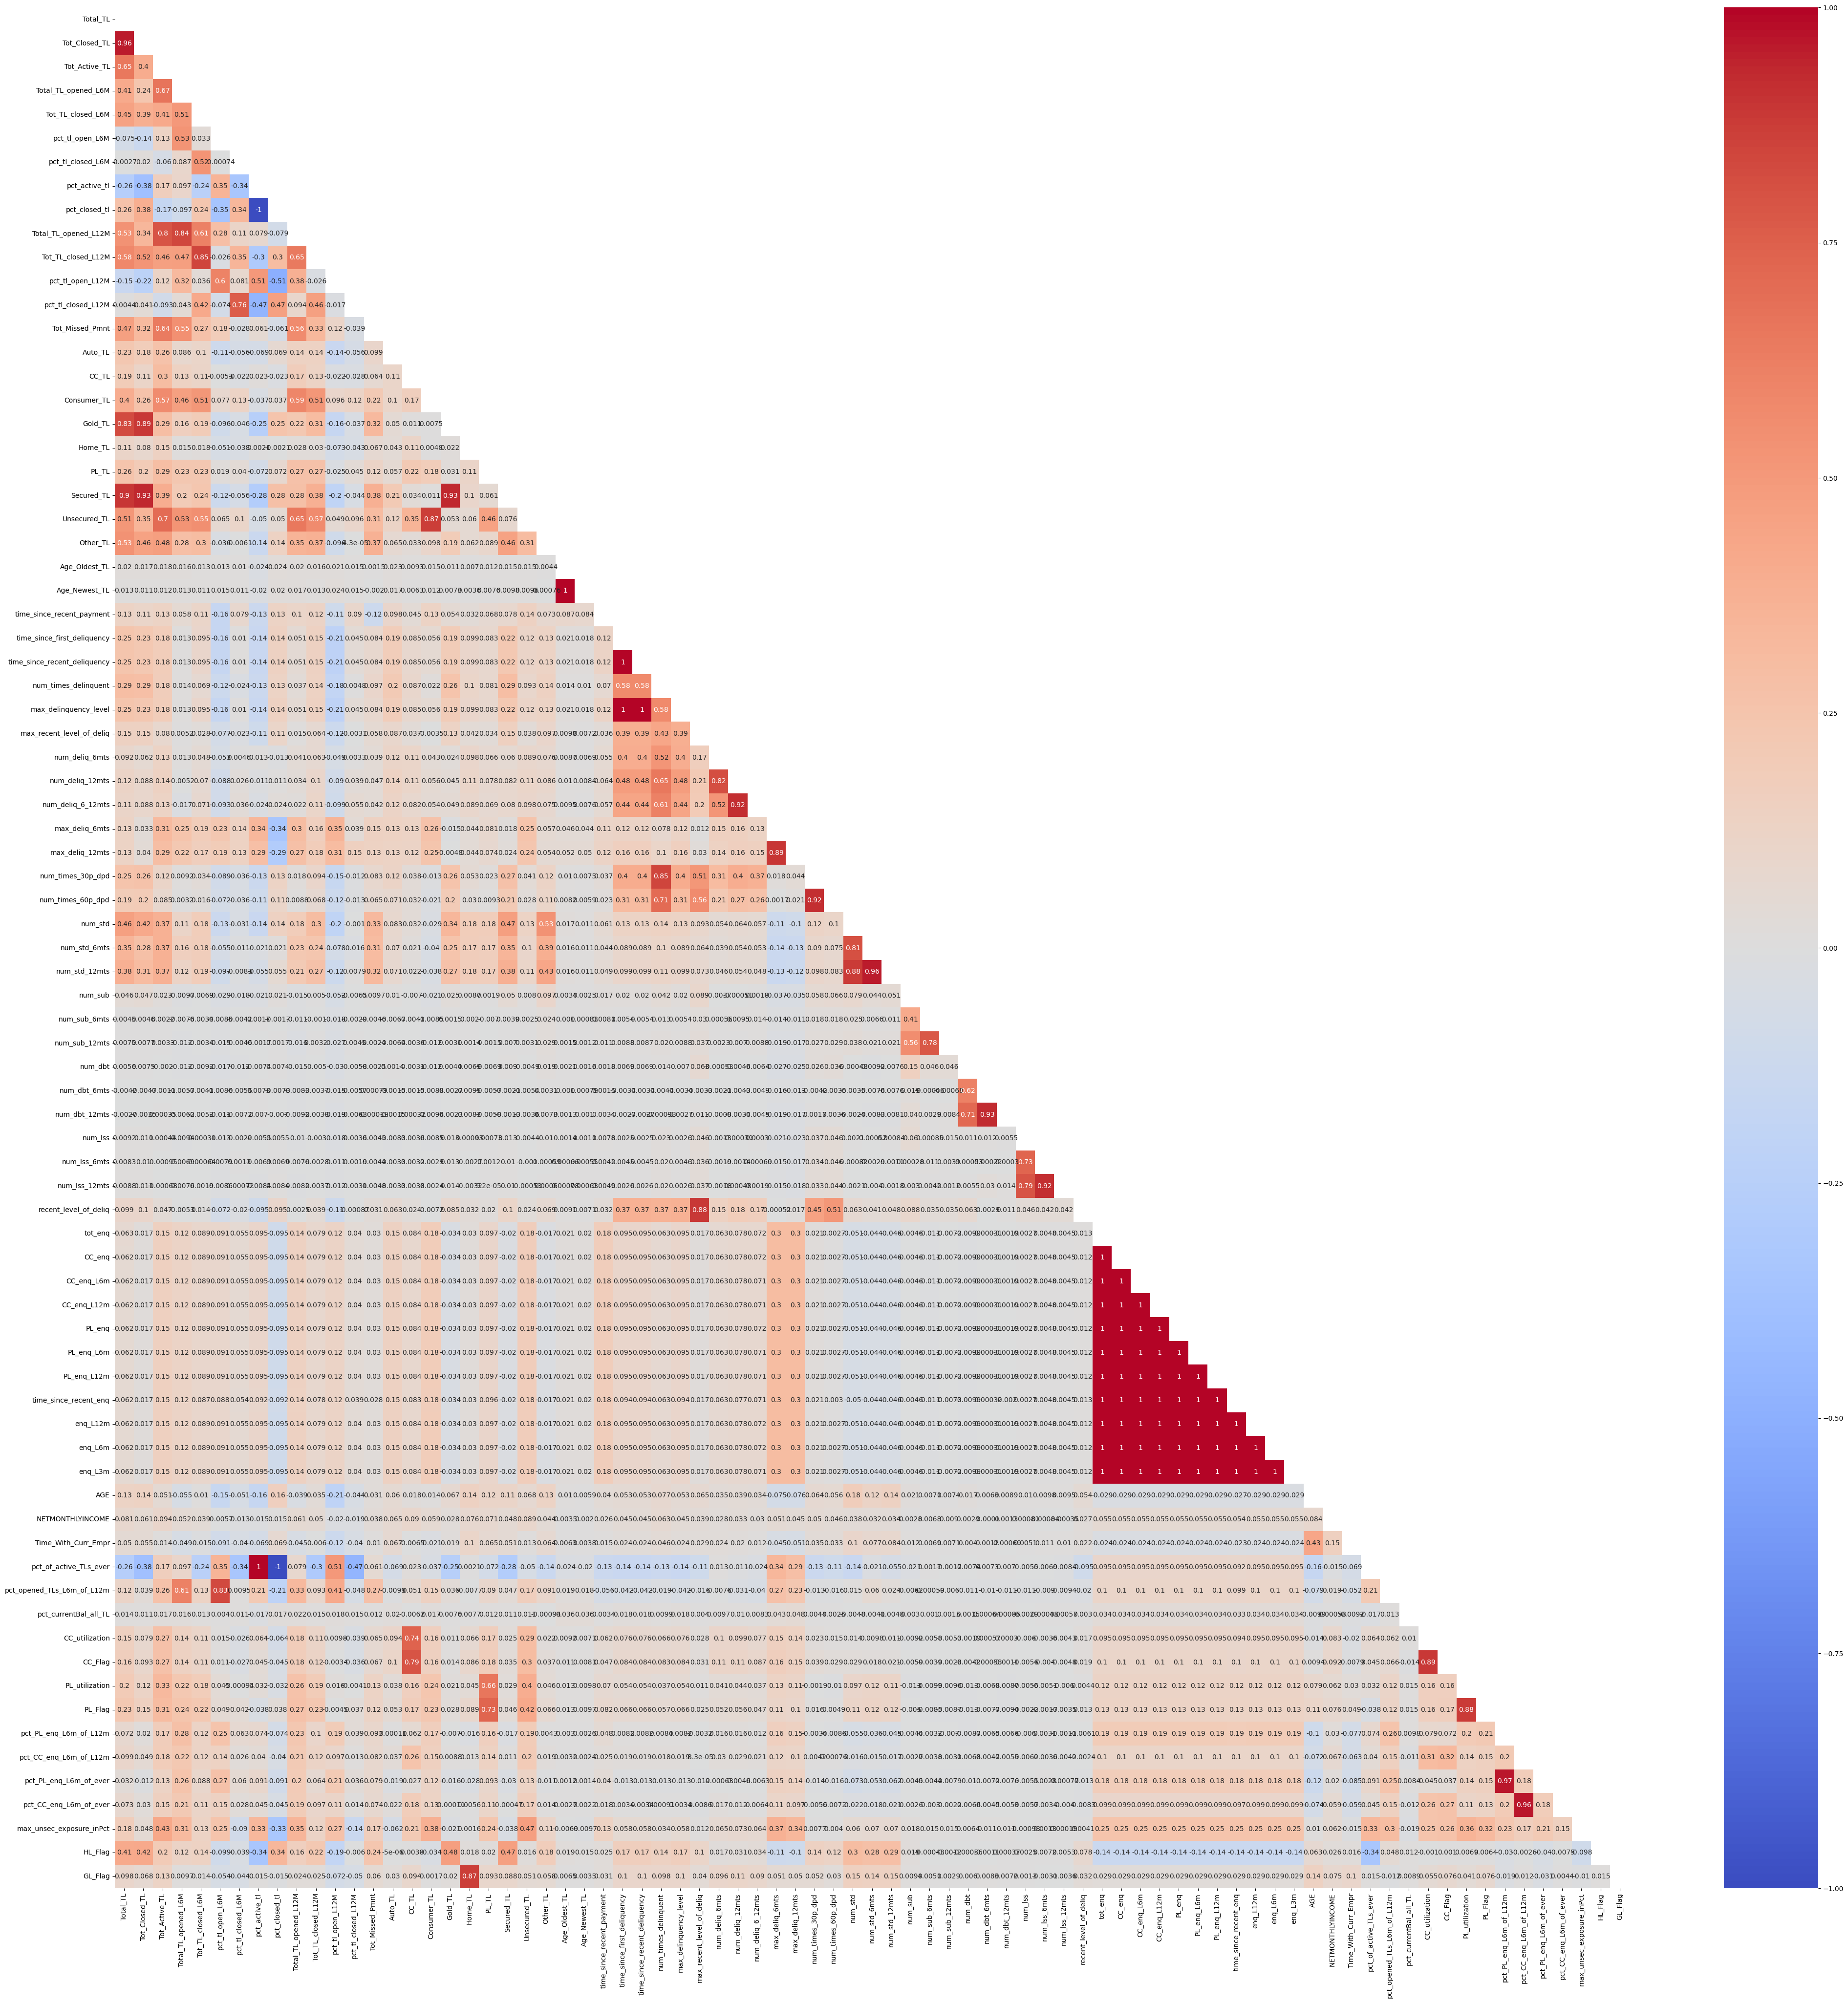

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')

In [ ]:
upper_triangle = corr.abs().where(np.triu(mask, k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] == 1)]
to_drop

['pct_of_active_TLs_ever']

In [ ]:
numeric_df = numeric_df.drop(columns=to_drop)

Создадим препроцессор для числовых и категориальных признаков

In [ ]:
preproccesor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy='median')),
        ("scaler", StandardScaler()) # По хорошем, до применения StandartScaler, пройти тесты на нормальность
    ]), numeric_df.columns),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("encoderr", OneHotEncoder(handle_unknown='ignore'))
    ]), cat_df.columns)
])

In [ ]:
X = pd.concat([numeric_df, cat_df], axis=1)
y = target_col

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
preproccesor_X_train = preproccesor.fit_transform(X_train)
preproccesor_X_test = preproccesor.transform(X_test)

In [ ]:
preproccesor_X_train

array([[-0.39369795, -0.12630582, -0.90787193, ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.71994241,  0.04191079,  2.15138575, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.41596763,  1.5558603 ,  0.4032385 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
feature_names = preproccesor.get_feature_names_out()
feature_names

array(['num__Total_TL', 'num__Tot_Closed_TL', 'num__Tot_Active_TL',
       'num__Total_TL_opened_L6M', 'num__Tot_TL_closed_L6M',
       'num__pct_tl_open_L6M', 'num__pct_tl_closed_L6M',
       'num__pct_active_tl', 'num__pct_closed_tl',
       'num__Total_TL_opened_L12M', 'num__Tot_TL_closed_L12M',
       'num__pct_tl_open_L12M', 'num__pct_tl_closed_L12M',
       'num__Tot_Missed_Pmnt', 'num__Auto_TL', 'num__CC_TL',
       'num__Consumer_TL', 'num__Gold_TL', 'num__Home_TL', 'num__PL_TL',
       'num__Secured_TL', 'num__Unsecured_TL', 'num__Other_TL',
       'num__Age_Oldest_TL', 'num__Age_Newest_TL',
       'num__time_since_recent_payment',
       'num__time_since_first_deliquency',
       'num__time_since_recent_deliquency', 'num__num_times_delinquent',
       'num__max_delinquency_level', 'num__max_recent_level_of_deliq',
       'num__num_deliq_6mts', 'num__num_deliq_12mts',
       'num__num_deliq_6_12mts', 'num__max_deliq_6mts',
       'num__max_deliq_12mts', 'num__num_times_30p_dpd

Сгенерируем синтетические данные для борьбы с несбалансированными данными

In [ ]:
smote = over_sampling.SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(preproccesor_X_train, y_train)

In [ ]:
X_res.shape, y_res.shape

((103036, 101), (103036,))

<Axes: >

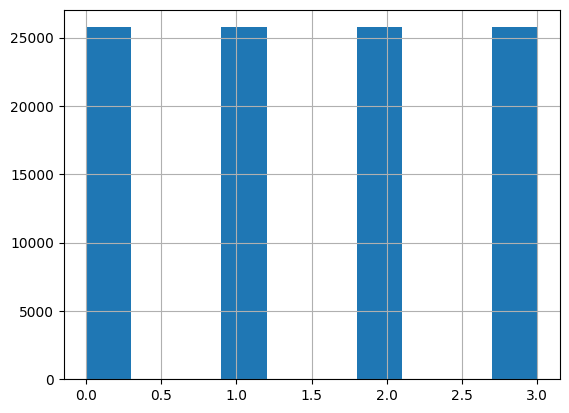

In [ ]:
y_res.hist()

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res)

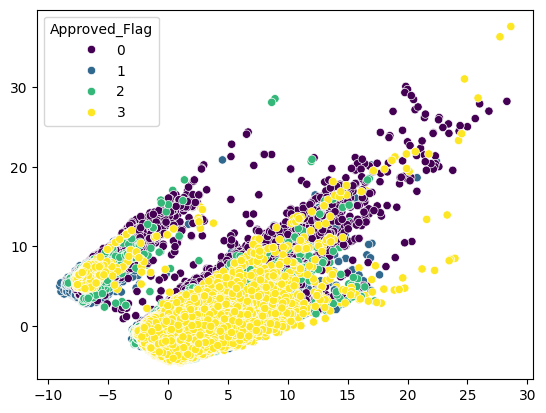

In [ ]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_res, palette='viridis')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
len(y_res)

103036

## Логистическая регрессия

In [ ]:
lr = LogisticRegression(max_iter=100)
params = {"C": [20, 10, 1, 0.1, 0.01, 0.001]}

grid_search = GridSearchCV(lr, params, cv=5, scoring='f1', refit=True, n_jobs=-1)

grid_search.fit(X_res, y_res)


print("Лучшие параметры модели", grid_search.best_params_)

Лучшие параметры модели {'C': 20}


In [ ]:
def metriks_model(model):
  y_pred = model.predict(preproccesor_X_test)
  print(classification_report(y_test, y_pred))

In [ ]:
metriks_model(grid_search)

              precision    recall  f1-score   support

           0       0.52      0.86      0.65      1161
           1       0.87      0.59      0.71      6440
           2       0.26      0.40      0.31      1491
           3       0.45      0.63      0.52      1176

    accuracy                           0.60     10268
   macro avg       0.52      0.62      0.55     10268
weighted avg       0.69      0.60      0.62     10268



## Метод К ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)


knn_model.fit(X_res, y_res)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [ ]:
metriks_model(knn_model)

              precision    recall  f1-score   support

           0       0.37      0.80      0.51      1161
           1       0.88      0.43      0.58      6440
           2       0.24      0.43      0.30      1491
           3       0.34      0.56      0.42      1176

    accuracy                           0.49     10268
   macro avg       0.46      0.55      0.45     10268
weighted avg       0.67      0.49      0.51     10268



## Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier()

params = {
    "max_depth": np.arange(1, 50, 5),
    "criterion": ["gini", "entropy", "log_loss"]
}

rand_search = RandomizedSearchCV(tree_model, params, cv=5, n_iter=10, scoring="f1", random_state=42)

rand_search.fit(X_res, y_res)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])},
                   random_state=42, scoring='f1')

In [ ]:
print(rand_search.best_params_)

{'max_depth': 36, 'criterion': 'log_loss'}


In [ ]:
metriks_model(rand_search)

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      1161
           1       0.86      0.81      0.83      6440
           2       0.34      0.39      0.36      1491
           3       0.68      0.70      0.69      1176

    accuracy                           0.73     10268
   macro avg       0.65      0.67      0.66     10268
weighted avg       0.74      0.73      0.74     10268



In [ ]:
# {'reg_lambda': 1.5, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.3, 'alpha': 0.15}

## Беггинг

***Случайных лес***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
r_forest = RandomForestClassifier(n_jobs=-1)
params = {
    "n_estimators": np.arange(80, 200, 10),
    "max_depth": np.arange(1, 50, 5),
    "criterion": ["gini", "entropy", "log_loss"]
}

rand_search_forest = RandomizedSearchCV(r_forest, params, cv=5, scoring="f1", n_iter=5, random_state=42)
rand_search_forest.fit(X_res, y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]),
                                        'n_estimators': array([ 80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190])},
                   random_state=42, scoring='f1')

In [ ]:
print(rand_search_forest.best_params_)

{'n_estimators': 160, 'max_depth': 41, 'criterion': 'entropy'}


In [ ]:
metriks_model(rand_search_forest.best_estimator_)

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1161
           1       0.87      0.87      0.87      6440
           2       0.45      0.38      0.41      1491
           3       0.72      0.75      0.73      1176

    accuracy                           0.78     10268
   macro avg       0.69      0.71      0.70     10268
weighted avg       0.77      0.78      0.78     10268



## Градиентный бустинг

In [ ]:
boost_model = xgb.XGBClassifier()

params = {"learning_rate": np.arange(0.1, 0.8, 0.1),
          "gamma":  np.arange(0.1, 0.5, 0.1),
          "max_depth": np.arange(3, 21, 3),
          "reg_lambda": [0.5, 1, 1.5, 2],
          "n_estimators": [50, 100, 150, 200],
          "alpha": np.arange(0, 1, 0.1)}

boostModelSerch = RandomizedSearchCV(boost_model, params, cv=5, n_iter=5, scoring="f1", n_jobs=-1)

boostModelSerch.fit(X_res, y_res)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': array([0.1, 0.2, 0.3, 0.4]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
                                        'max_depth': array([ 3,  6,  9, 12, 15, 18]),
                                        'n_estimators': [50, 100, 150, 200],
                                        'reg_lambda': [0.5, 1, 1.5, 2]},
                   scoring='f1')

In [ ]:
metriks_model(boostModelSerch)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1161
           1       0.86      0.90      0.88      6440
           2       0.45      0.34      0.39      1491
           3       0.76      0.77      0.76      1176

    accuracy                           0.79     10268
   macro avg       0.71      0.71      0.71     10268
weighted avg       0.78      0.79      0.79     10268



## Стекинг

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [
    ("knn", KNeighborsClassifier(n_neighbors=10)),
    ("dt", DecisionTreeClassifier(max_depth=36, criterion='log_loss', random_state=42)),
    ("rf", RandomForestClassifier(n_estimators=160, max_depth=41, criterion='entropy'))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_res, y_res)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('dt',
                                DecisionTreeClassifier(criterion='log_loss',
                                                       max_depth=36,
                                                       random_state=42)),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=41,
                                                       n_estimators=160))],
                   final_estimator=LogisticRegression())

In [ ]:
metriks_model(clf)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1161
           1       0.85      0.88      0.87      6440
           2       0.42      0.33      0.37      1491
           3       0.71      0.71      0.71      1176

    accuracy                           0.77     10268
   macro avg       0.68      0.67      0.68     10268
weighted avg       0.76      0.77      0.76     10268



## Итог

Для кредитного скоринга была проведена предобработка, балансировка данных, а также ***one-hot*** кодирование категориальных признаков и ***StandartScaller*** числовых.
<br>
<br>
Для классификации были использованы модели *Логистической регрессии, К ближайших соседей, Дерево решений и Случайный лес*, с подбором параметров для каждой модели. Так же использовался Градиентный бустинг ***xgb.XGBClassifier*** с пдбором параметров на основе ***RandomSearch*** и стратегия *Стекинга* на основе стандартных алгоритмов и финальной моделью *Логистической регрессии*.
<br>
<br>
Наилучшей стратегий оказался Градиентный бустинг с f1 метрикой для категорий 0, 1, 2, 3 с оценкой 0.8, 0.88, 0.39, 0.76 соответственно.
Тем неменее, класс 2 классифицируется плохо всеми используемыми моделями и стратегиями.